# 잔차분석

## #01. 잔차분석의 이해

### [1] 잔차

실제 관측값과 예측값의 사이

즉, 예측값에 대한 오차를 의미함

$$잔차=실제관측값−예측값$$

### [2] 잔차 분석

회귀분석 수행 후 회귀 분석이 적절하게 수행되었는지, 모델이 데이터에 적합한지를 평가하기 위해 사용

아래의 요건들을 충족할 경우 회귀분석의 결과를 신뢰할 수 있다고 판단함.

| 구분 | 검정 방법 |
|---|---|
| 선형성 | 잔차에 대한 정규분포 확인 / 잔차 그래프 시각화 |
| 정규성 | 잔차에 대한 normaltest, shapiro, Kolmogorov-Smirnov 검정 / QQPlot, 잔차도 시각화 |
| 등분산성 | Breusch-Pagan, Brown-Forsythe 검정 |
| 독립성 | 더빈 왓슨 통계량 |

## #02. 준비작업

### [1] 패키지 참조

In [1]:
# import sys
# import os
# work_path = os.path.abspath(os.path.join(os.getcwd(), '../../../../'))
# sys.path.append(work_path)
# from helper.regression import *
# from helper.plot import *
# from helper.util import *
# from helper.analysis import *

from hossam.plot import *
from hossam.regression import *
from hossam.util import *
from hossam.analysis import *


### [2] 데이터 가져오기

In [5]:
origin = my_read_excel('C:/Users/J/Desktop/Class/수업data/boston.xlsx',info=False)
my_pretty_table(origin.head())


상위 5개 행
+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |   MEDV |
|----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------|
|  0 | 0.00632 |   18 |    2.31 |      0 | 0.538 | 6.575 |  65.2 |   4.09 |     1 |   296 |      15.3 |  396.9 |    4.98 |     24 |
|  1 | 0.02731 |    0 |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 |  396.9 |    9.14 |   21.6 |
|  2 | 0.02729 |    0 |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |   34.7 |
|  3 | 0.03237 |    0 |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |   33.4 |
|  4 | 0.06905 |    0 |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 

## #02. 선형회귀 분석

앞 예제에서 도출한 과정을 재현한다.

### [1] 데이터 전처리

#### (1) 불필요한 요인 제거

In [6]:
ignore = ['TAX', 'INDUS', 'AGE', 'CHAS', 'CRIM', 'RAD', 'ZN', 'B']
df = origin.drop(ignore, axis=1)
my_pretty_table(df.head())

+----+-------+-------+--------+-----------+---------+--------+
|    |   NOX |    RM |    DIS |   PTRATIO |   LSTAT |   MEDV |
|----+-------+-------+--------+-----------+---------+--------|
|  0 | 0.538 | 6.575 |   4.09 |      15.3 |    4.98 |     24 |
|  1 | 0.469 | 6.421 | 4.9671 |      17.8 |    9.14 |   21.6 |
|  2 | 0.469 | 7.185 | 4.9671 |      17.8 |    4.03 |   34.7 |
|  3 | 0.458 | 6.998 | 6.0622 |      18.7 |    2.94 |   33.4 |
|  4 | 0.458 | 7.147 | 6.0622 |      18.7 |    5.33 |   36.2 |
+----+-------+-------+--------+-----------+---------+--------+


### [2] 데이터 분할

In [7]:
x_train, x_test, y_train, y_test = my_train_test_split(df, yname='MEDV'
, scalling=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 5), (404,), (102, 5), (102,))

### [3] 선형회귀 분석

[교차검증 TOP5]
+----+-----------------+-------------------+
|    | fit_intercept   |   mean_test_score |
|----+-----------------+-------------------|
|  0 | True            |          0.737481 |
|  1 | False           |           -5.6438 |
+----+-----------------+-------------------+

[Best Params]
{'fit_intercept': True}

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |      0.74718 |     0.535251 |
| 평균절대오차(MAE)             |      3.33954 |      4.20834 |
| 평균제곱오차(MSE)             |       21.526 |      37.8438 |
| 평균오차(RMSE)                |      4.63962 |      6.15173 |
| 평균 절대 백분오차 비율(MAPE) |      17.0655 |      20.8033 |
| 평균 비율 오차(MPE)           |     -3.60857 |     -5.98541 |
+-------------------------------+--------------+--------------+

[학습곡선]


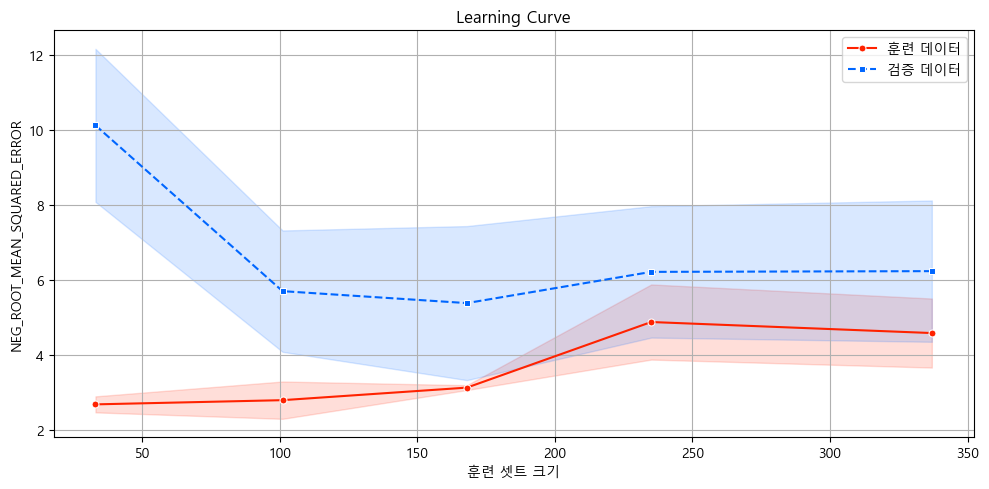


[회귀식]
MEDV = -2.174 * NOX + 2.764 * RM + -2.254 * DIS + -2.624 * PTRATIO + -4.104 * LSTAT + 22.612

[독립변수보고]
+----+------------+------------+--------------------+------------+------------------+--------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |      t |   유의확률 |     VIF |
|----+------------+------------+--------------------+------------+------------------+--------+------------+---------|
|  0 | MEDV       | NOX        |            -2.1742 |      1.039 |           -0.136 | -2.093 |      0.039 | 2.90665 |
|  1 | MEDV       | RM         |             2.7644 |      0.756 |            0.379 |  3.657 |          0 | 1.57488 |
|  2 | MEDV       | DIS        |             -2.254 |      0.969 |           -0.303 | -2.325 |      0.022 |  2.6783 |
|  3 | MEDV       | PTRATIO    |             -2.624 |      0.779 |           -0.087 | -3.367 |      0.001 | 1.33729 |
|  4 | MEDV       | LSTAT      |            -4.1035 |      1.065 |           -0.468 | -3.85

In [10]:
fit = my_linear_regression(x_train,y_train,x_test,y_test)

## #03. 잔차 분석

일반적으로 검증데이터에 대해 수행한다.

### [1] 잔차 구하기

In [11]:
y_pred = fit.predict(x_test)

resid = y_test - y_pred
resid

329    -5.272235
371    26.619982
219    -4.158745
403    -4.111072
78     -1.952830
         ...    
56     -0.411699
455    -2.746675
60      1.857355
213     2.414953
108    -2.954409
Name: MEDV, Length: 102, dtype: float64

### [2] 선형성

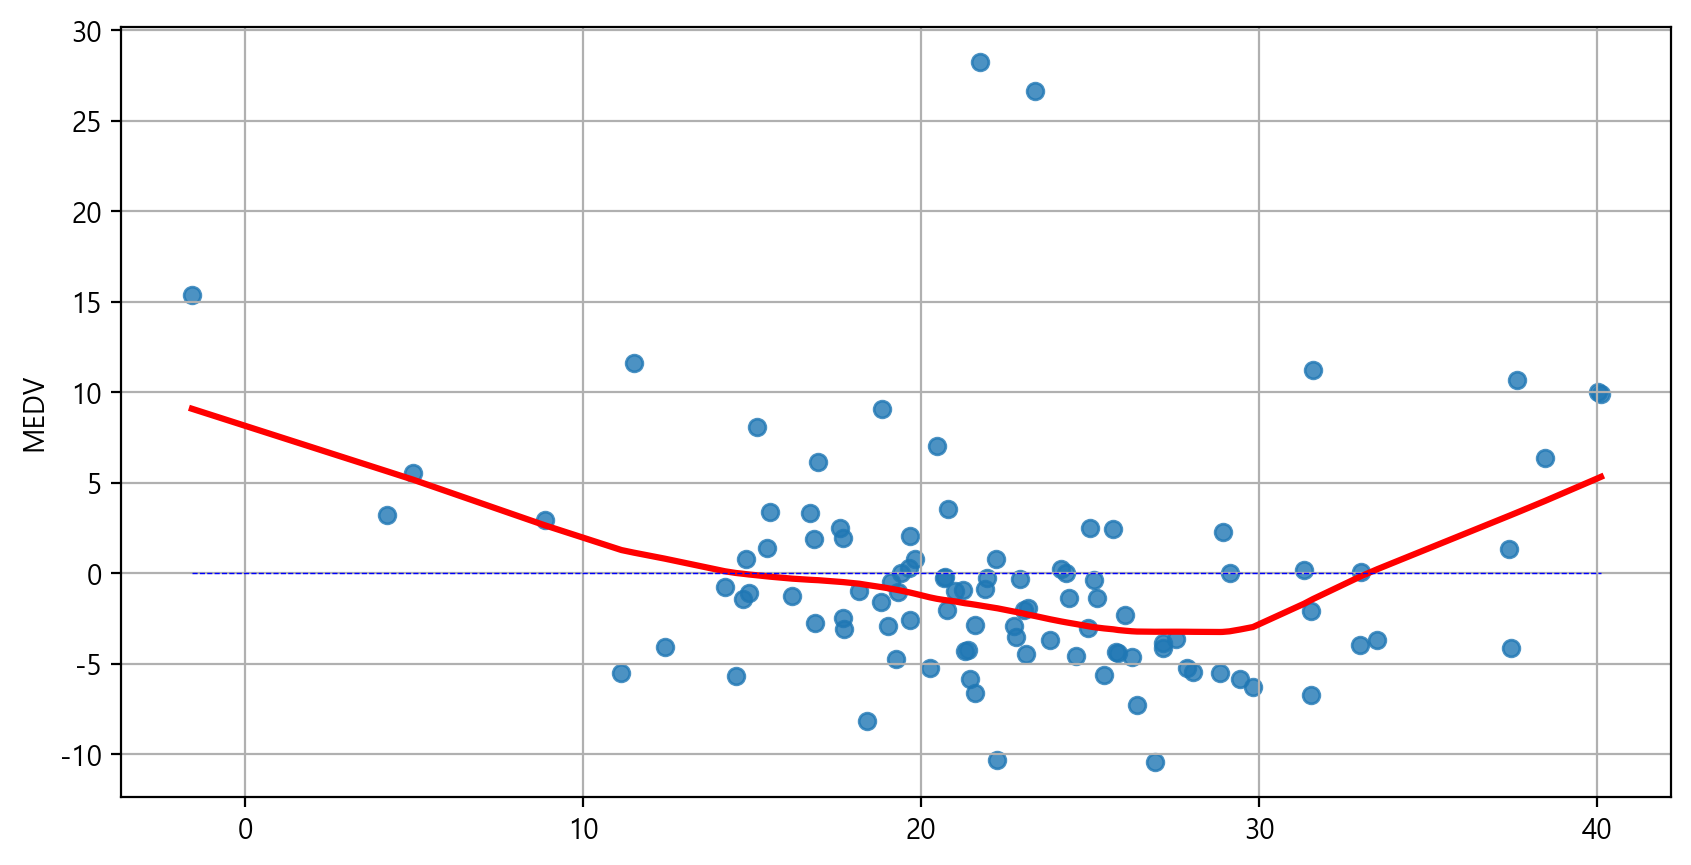

In [12]:
plt.figure(figsize=(10,5))

sb.regplot(x=y_pred, y=resid, lowess=True, line_kws={'color':'red'})
sb.lineplot(x=[y_pred.min(), y_pred.max()], y=[0,0], color='blue',linestyle='--', linewidth=0.5)
plt.grid()
plt.show()
plt.close()

### [3] 정규성

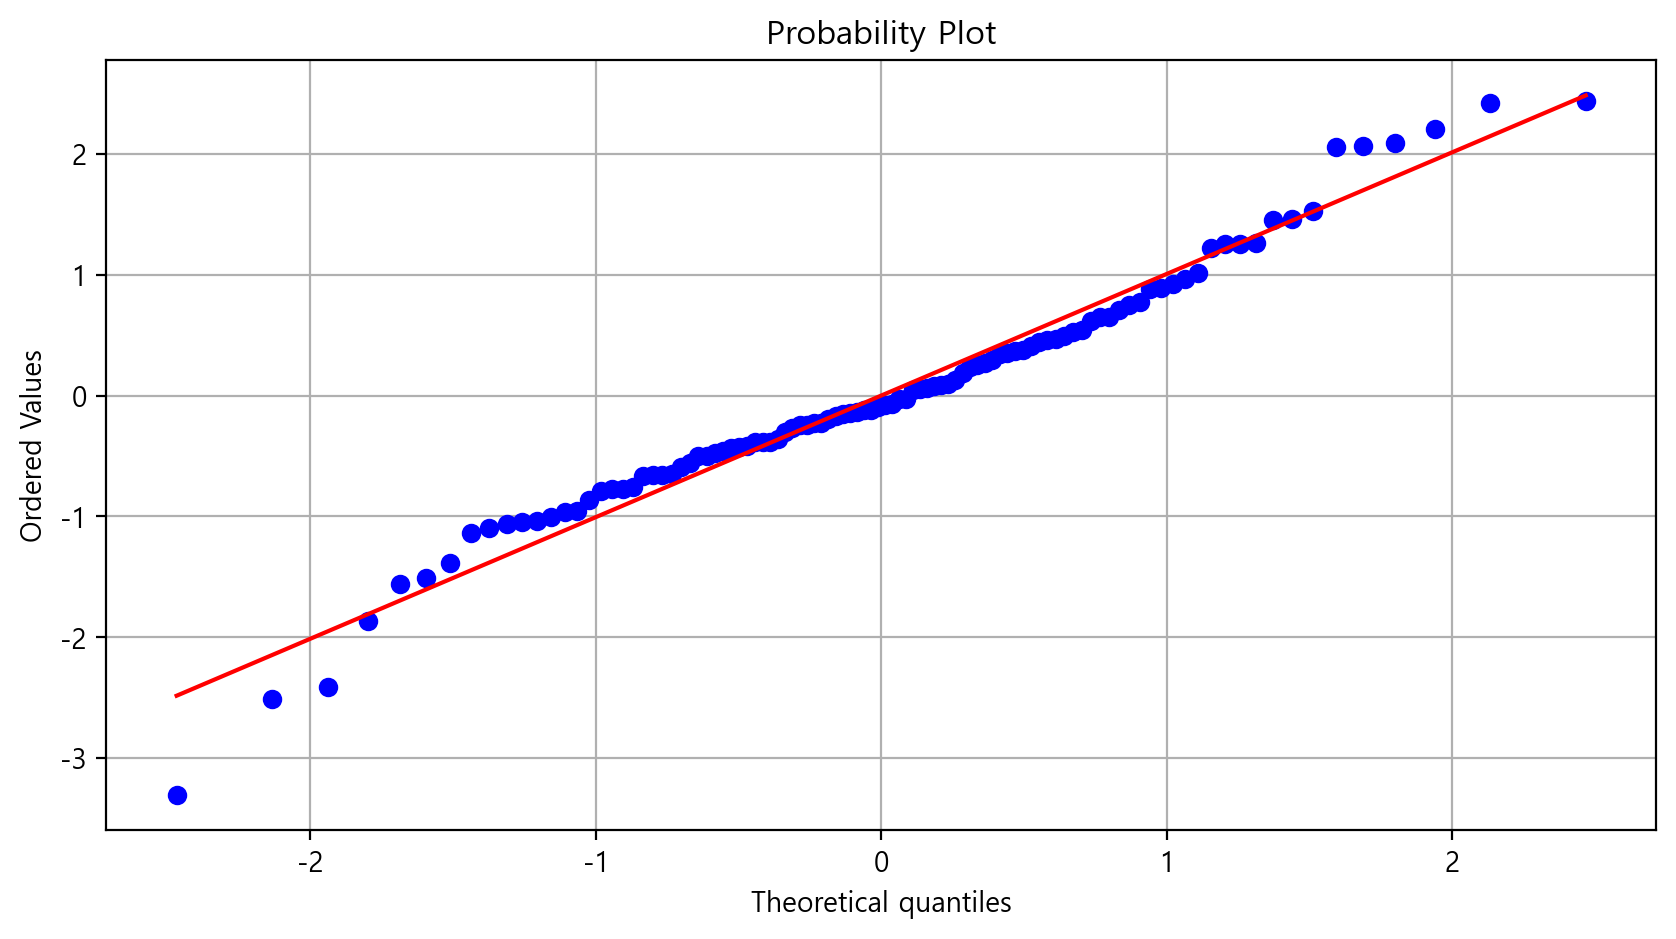

In [13]:
zs = zscore(y_pred)

plt.figure(figsize=(10,5))
probplot(zs, plot=plt)
plt.grid()
plt.show()
plt.close()



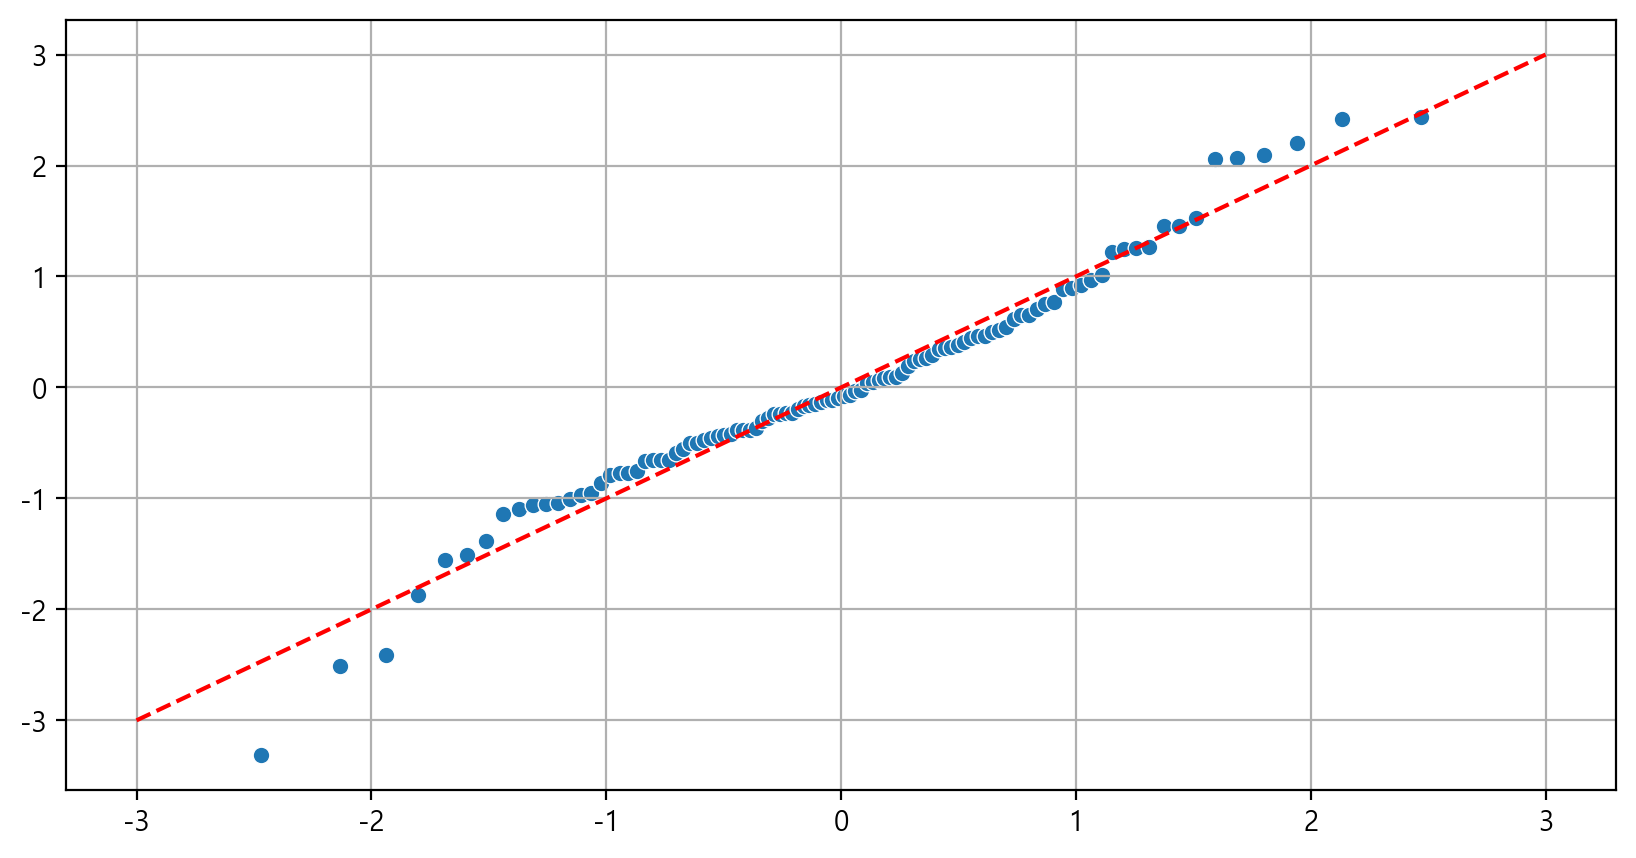

In [14]:
zs = zscore(y_pred)

plt.figure(figsize=(10,5))
(x, y), _ = probplot(zs)
#print(x,y)
sb.scatterplot(x=x,y=y)
sb.lineplot(x=[-3,3], y=[-3,3], color='red', linestyle='--')

plt.grid()
plt.show()
plt.close()


#### (2) 잔차도

잔차가 정규분포를 따른다면 대략적으로...

- $\pm\sqrt{MSE}$ 범위 안에 최소 `68%`의 잔차가 포함된다.
- $\pm2\sqrt{MSE}$ 범위 안에 최소 `95%`의 잔차가 포함된다.
- $\pm3\sqrt{MSE}$ 범위 안에 최소 `99%`의 잔차가 포함된다.

In [15]:
mse = mean_squared_error(y_test,y_pred)
mse_sq = np.sqrt(mse)

r1 = resid[(resid > -mse_sq) & (resid < mse_sq)].count() / resid.count() * 100
r2 = resid[(resid > -2*mse_sq) & (resid < 2*mse_sq)].count() / resid.count() * 100
r3 = resid[(resid > -3*mse_sq) & (resid < 3*mse_sq)].count() / resid.count() * 100

mse_r = [r1, r2, r3]

print(f"루트 1MSE 구간에 포함된 잔차 비율: {r1:1.2f}%")
print(f"루트 2MSE 구간에 포함된 잔차 비율: {r2:1.2f}%")
print(f"루트 3MSE 구간에 포함된 잔차 비율: {r3:1.2f}%")

루트 1MSE 구간에 포함된 잔차 비율: 81.37%
루트 2MSE 구간에 포함된 잔차 비율: 97.06%
루트 3MSE 구간에 포함된 잔차 비율: 98.04%


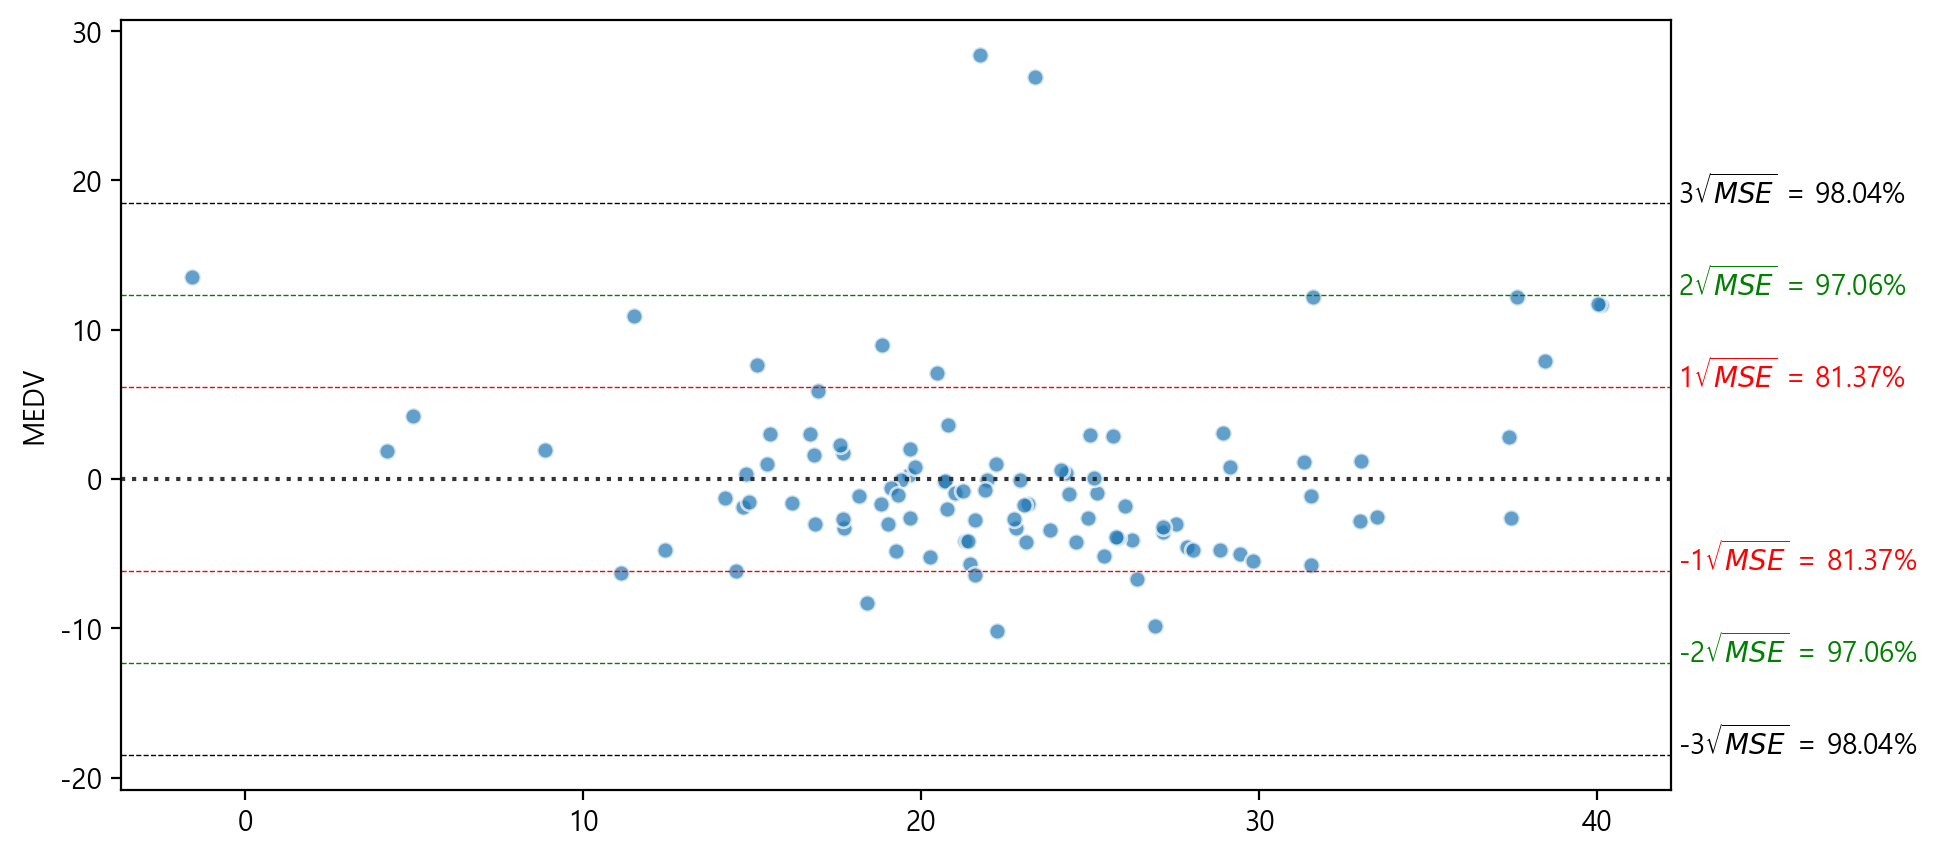

In [16]:
plt.figure(figsize=(10,5))

sb.residplot(x=y_pred, y=resid, 
            scatter_kws = {'edgecolor':"white", "alpha":0.7})

for i, c in enumerate(['red', 'green', 'black']):
    plt.axhline(mse_sq * (i+1), color=c, linestyle='--', linewidth=0.5)
    plt.axhline(mse_sq * (-(i+1)), color=c, linestyle='--', linewidth=0.5) 

xmin, xmax = plt.xlim()

for i, c in enumerate(['red', 'green', 'black']):
    plt.text(s=f"{i+1}"r'${}\sqrt{MSE}$ = %.2f%%' % mse_r[i], x=xmax+0.2, y=(i+1)* mse_sq, color=c)
    plt.text(s=f"-{i+1}"r'${}\sqrt{MSE}$ = %.2f%%' % mse_r[i], x=xmax+0.2, y=-(i+1)* mse_sq, color=c)

plt.show()
plt.close()        


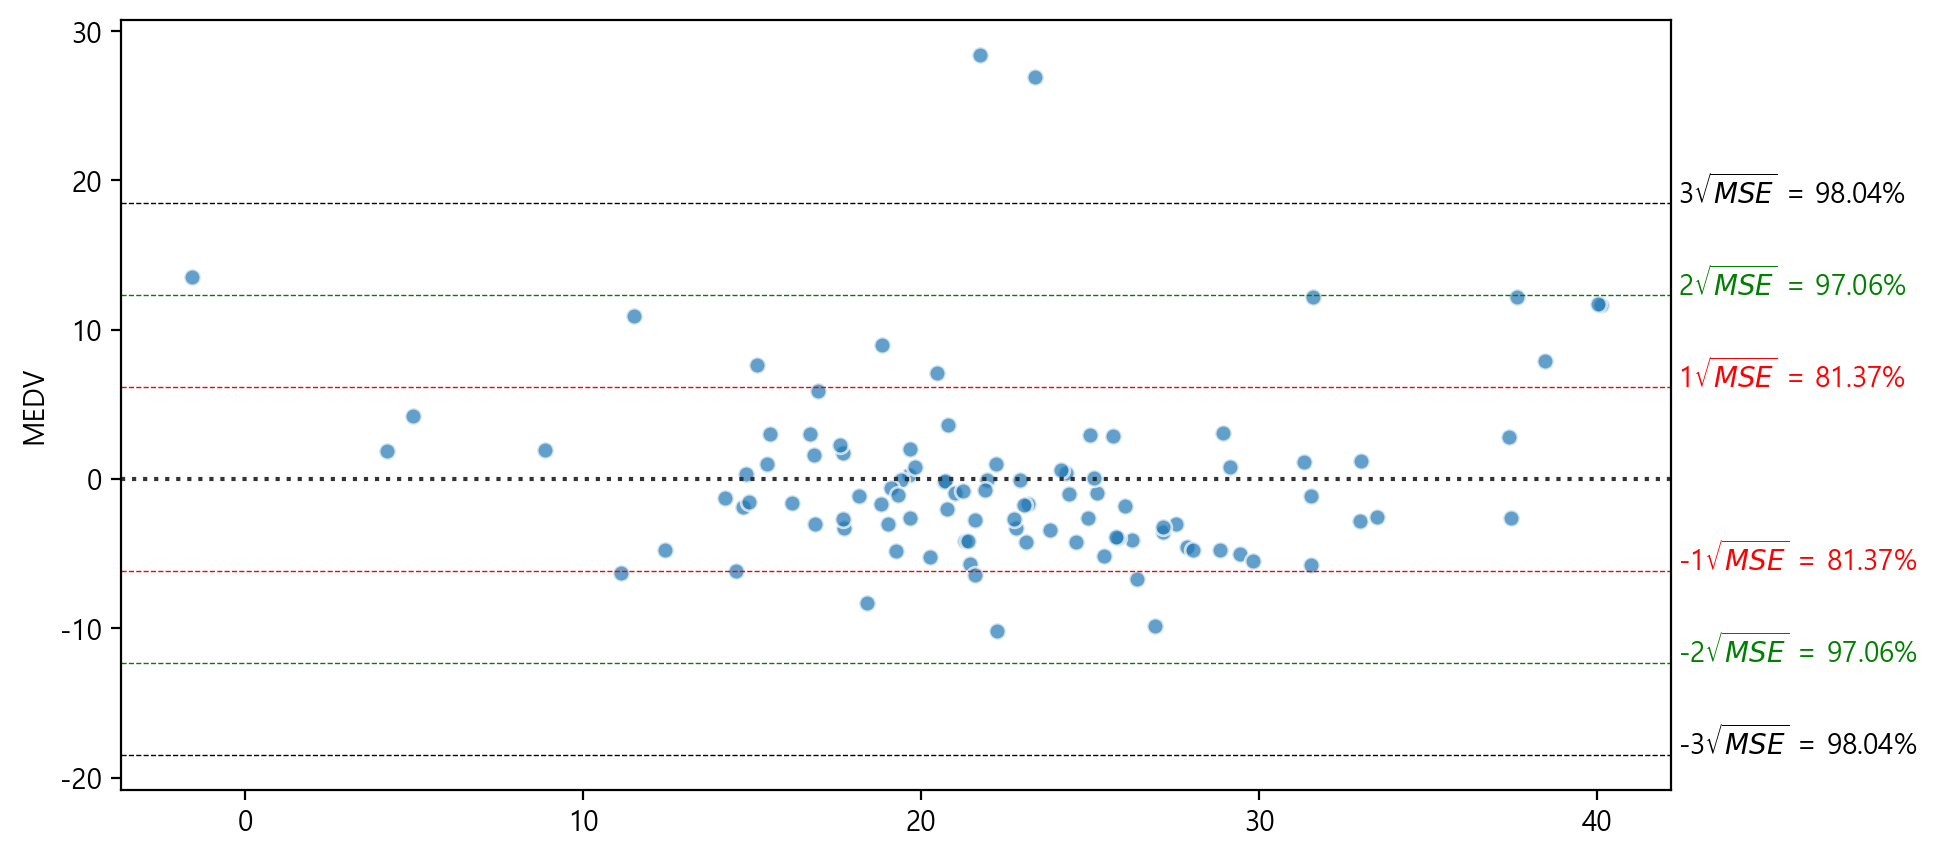

In [17]:
plt.figure(figsize=(10, 5))

# 일반적인 잔차도
# sb.residplot(x=y_pred, y=resid, lowess=True, line_kws={'color': 'red'})

sb.residplot(x=y_pred, y=resid, 
             scatter_kws = {'edgecolor':"white", "alpha":0.7})

for i, c in enumerate(['red', 'green', 'black']):
    plt.axhline(mse_sq * (i+1), color=c, linestyle='--', linewidth=0.5)
    plt.axhline(mse_sq * (-(i+1)), color=c, linestyle='--', linewidth=0.5)

# 현재 표시되는 그래프의 x축 범위를 가져온다.
xmin, xmax = plt.xlim()

for i, c in enumerate(['red', 'green', 'black']):
    plt.text(s=f"{i+1}"r'${}\sqrt{MSE}$ = %.2f%%' % mse_r[i], x=xmax+0.2, y=(i+1)*mse_sq, color=c)
    plt.text(s=f"-{i+1}"r'${}\sqrt{MSE}$ = %.2f%%' % mse_r[i], x=xmax+0.2, y=-(i+1)*mse_sq, color=c)

plt.show()
plt.close()

### [4] 등분산성 (브로이슈-패건 검정)

| 가설 | 내용 |
|--|--|
| 귀무가설 | 등분산성 가정이 만족된다 (오차의 분산은 독립변수들과 관련이 없다) |
| 대립가설 | 등분산성 가정이 만족되지 않는다(오차의 분산은 독립변수들과 관련이 있다) |

In [22]:
x_test_copy = x_test.copy()
x_test_copy.insert(0, "const", 1)
bs_result = het_breuschpagan(resid, x_test_copy)
bs_result
#DataFrame(bs_result)
# bs_result_df = DataFrame(bs_result, columns=['values'], index=['statistic', 'p-value', 'f-value', 'f p-value'])
# my_pretty_table(bs_result_df)

# "등분산성 가정 충족" if bs_result[1] > 0.05 else "등분산성 가정 위배"

(9.047386033836952,
 0.1071889502566555,
 1.8687996435786522,
 0.10692257813548678)

### [5] 독립성

회귀분석 결과표 하단의 Dubin-Watson 값을 확인한다.

| 수치 | 해석 |
|---|---|
| `0` | 잔차들이 양의 상관 관계 (독립성 X) |
| `2` | 잔차들이 독립 |
| `4` | 잔차들이 음의 상관 관계 (독립성 X) |

일반적으로 DW값이 `1.5` ~ `2.5` 범위에 있으면 독립으로 판정

In [ ]:
dw = durbin_watson(resid)
print(f"Durbin-Watson: {dw}, 독립성 가정 만족 여부:{dw > 1.5 and dw <2.5}")